In [2]:
# load dataset
# explore dataset
# separate features into types if necessary
# asign features and labels (X, y)
# separate data into trainig, and test
# clean data: data types, nulls, inconsistent names, etc
# test several classification algorithms with kfold cv from training 
# scale features
# plot histograms, scatter matrix, and correlations 
# research on what to do with correlations 
# remove outliers
# use PCA/ICA 
# create new features
# select with pipeline, kBest, percentile, recursive feature elimination
# test selected algorithm
# tune parameters with GridSearch CV
# test algorithm with test set
# evaluate with metrics/learning curve

In [3]:
import pandas as pd
data = pd.read_csv('Iris.csv')
print(data.shape)
data.head(5)

(150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
X, y = data[data.columns[1:data.shape[1] - 1]], pd.DataFrame(data['Species'])

In [5]:
import numpy as np
columns =  X.columns
for column in columns:
    vals = [type(val) for val in X[column].unique()]
    print('feature: {0}, types: {1}'.format(column, np.unique(vals)))

feature: SepalLengthCm, types: [<type 'numpy.float64'>]
feature: SepalWidthCm, types: [<type 'numpy.float64'>]
feature: PetalLengthCm, types: [<type 'numpy.float64'>]
feature: PetalWidthCm, types: [<type 'numpy.float64'>]


In [6]:
 print "Null values in X:", X.isnull().values.sum()
 print "Null values in y:", y.isnull().values.sum()

Null values in X: 0
Null values in y: 0


In [7]:
print "Classes:", y['Species'].unique()

Classes: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


In [8]:
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import numpy
#import xgboost
from sklearn import cross_validation
from sklearn.metrics import accuracy_score

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA",'GBC','ETC', 'XGB']

classifiers = [
    #KNeighborsClassifier(3), #0.946666666667
    #SVC(kernel="linear", C=0.025), #0.866666666667
    #SVC(gamma=2, C=1), #0.946666666667
    #GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True), #0.78
    #DecisionTreeClassifier(max_depth=5), #0.913333333333
    #RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1), #0.92
    #MLPClassifier(alpha=1), #0.94
    #AdaBoostClassifier(), #0.94
    #GaussianNB(), #0.946666666667
    #QuadraticDiscriminantAnalysis(),#0.966666666667 this seems to be the best up until now
    #GradientBoostingClassifier(), #0.926666666667
    ExtraTreesClassifier() # 0.946666666667 tune parameters for this one for feature extraction
    #xgboost.XGBClassifier() # trouble importing
]

/home/jose/.local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [9]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)
for i, clf in enumerate(classifiers):
    print(names[i])
    scores = [
        clf.fit(X.values[train], y.values[train]).score(X.values[test],y.values[test]) 
        for train, test in kf.split(X.values)
    ]
    print 'Score:', np.array(scores).mean()
    clf.fit(X.values,y.values)

/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Nearest Neighbors
Score: 0.933333333333


/home/jose/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


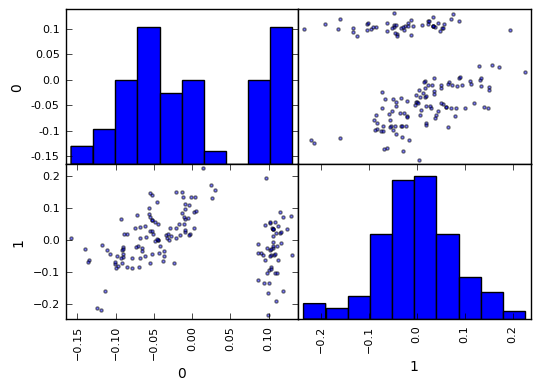

In [29]:
import matplotlib.pyplot as plt
from sklearn import preprocessing
from pandas.tools.plotting import scatter_matrix
from sklearn.decomposition import FastICA

ica = FastICA(n_components=2)
ica.fit(X.values)
X_n = ica.transform(X)

X = pd.DataFrame(preprocessing.scale(X))
scatter_matrix(pd.DataFrame(X_n))
#plt.ylabel(X.columns[1])
#plt.xlabel(X.columns[2])
#plt.scatter(X[X.columns[1]], X[X.columns[2]], marker='x')
plt.show() # there's a clear 2-class separation, the third one must be tangled with one of those
           # perhaps that's why QuadraticDiscriminantAnalysis works so well
# QuadraticDiscriminantAnalysis cannot be tunned any further so we will leave this problem for now